In [1]:
import pandas as pd

# 读取数据集
df = pd.read_csv('D:\\Desktop\\jewelry.csv')

print("数据基本信息:")
df.info()
print(df.describe())

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2018-12-01 11:40:29 UTC  95910 non-null  object 
 1   1924719191579951782      95910 non-null  int64  
 2   1842195256808833386      95910 non-null  int64  
 3   1                        95910 non-null  int64  
 4   1806829201890738522      90558 non-null  float64
 5   jewelry.earring          85977 non-null  object 
 6   0                        91125 non-null  float64
 7   561.51                   90558 non-null  float64
 8   1515915625207851155      90558 non-null  float64
 9   Unnamed: 9               47743 non-null  object 
 10  red                      88250 non-null  object 
 11  gold                     90448 non-null  object 
 12  diamond                  61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB
       1924

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('D:\\Desktop\\jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


In [5]:
df.Gender.fillna('f', inplace=True)
df.drop('Quantity',axis=1, inplace=True)
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


In [7]:
new_df.CategoryCode.fillna('other', inplace=True)
new_df['BrandID'].fillna('-1',inplace=True)
new_df['Gem'].unique()
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Color
red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: count, dtype: int64


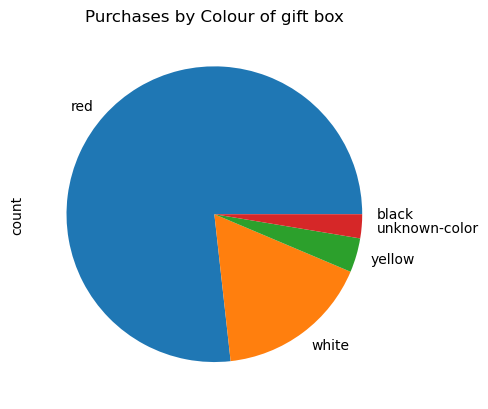

In [89]:
# Which colour of gift box is purchased most frequently
print(new_df.Color.value_counts())
new_df['Color'].value_counts().plot(kind='pie');
plt.title('Purchases by Colour of gift box')
plt.show()

Text(0.5, 1.0, 'Color by Jewellery Type')

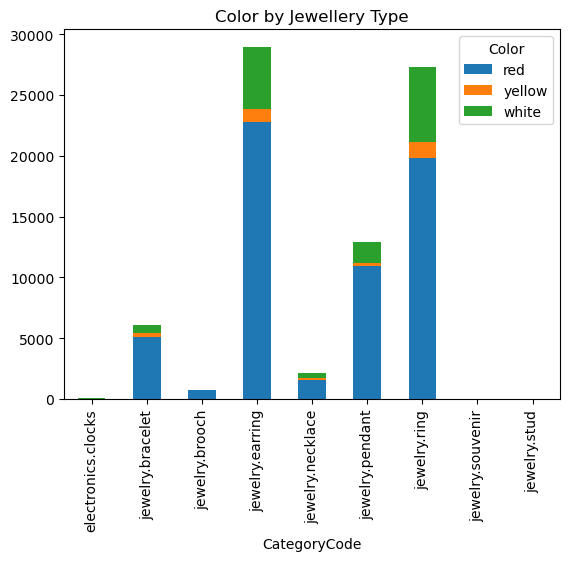

In [91]:
df_boxColourByJewelleryType = df.groupby(['CategoryCode','Color'])['CategoryCode'].count().unstack('Color')
df_boxColourByJewelleryType[['red','yellow','white']].plot(kind='bar', stacked=True)
plt.title('Color by Jewellery Type')

Metal
gold        89082
silver       1365
unknown       110
platinum        2
Name: count, dtype: int64


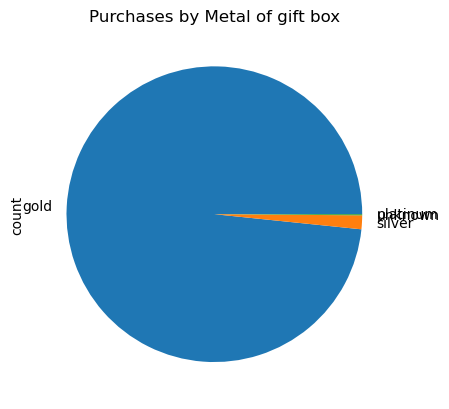

In [93]:
# Which colour of gift box is purchased most frequently
print(new_df.Metal.value_counts())
new_df['Metal'].value_counts().plot(kind='pie');
plt.title('Purchases by Metal of gift box')
plt.show()

Metal
gold        89082
silver       1365
unknown       110
platinum        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

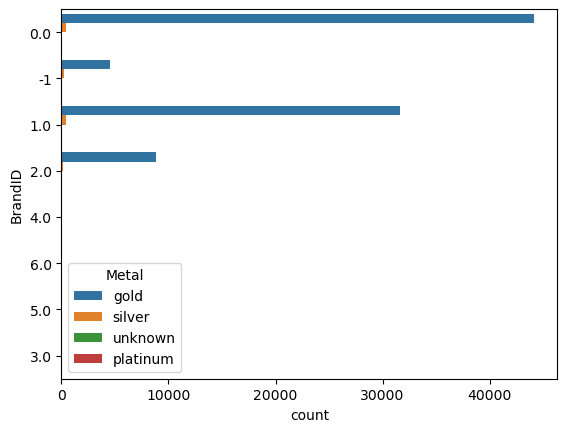

In [73]:
print(new_df.Metal.value_counts())
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

<Axes: xlabel='count', ylabel='CategoryCode'>

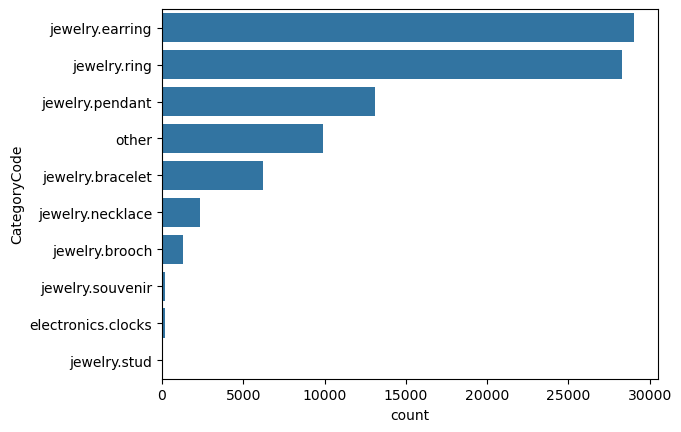

In [75]:
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

BrandID
0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

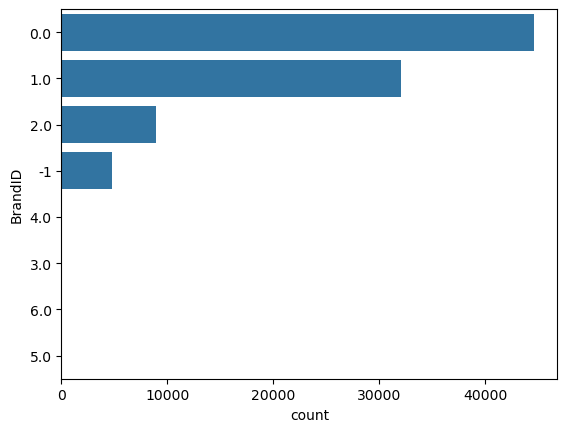

In [95]:
print(new_df.BrandID.value_counts())
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

<Axes: xlabel='BrandID', ylabel='count'>

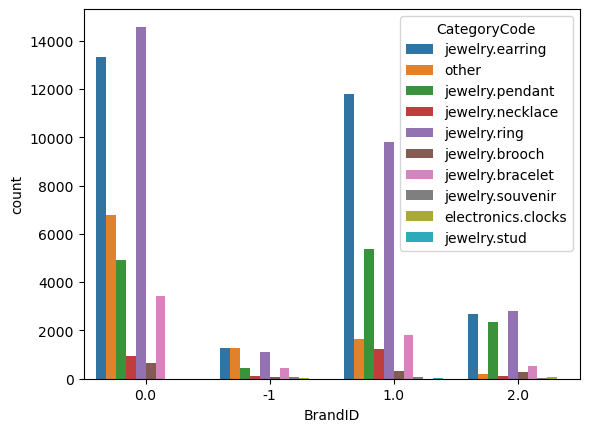

In [77]:
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

In [11]:
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [13]:
from datetime import datetime

new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 9.0+ MB


In [15]:
sales_df =  pd.pivot_table(new_df, 
                 index= 'Datetime' ,
                 values= 'USDPrice'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.head()
sales_df.sort_values('Datetime',inplace=True)

In [17]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.65,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,...,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,12764.49
31,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,...,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,14353.13
32,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,...,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,8185.48
33,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,...,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,17748.04
34,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,2443.00,...,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,1045.02,12493.57


In [19]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [21]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (476, 31, 1)
Validation set shape (318, 31, 1)
Validation set shape (199, 31, 1)


In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot

In [25]:
import tensorflow as tf
epochs = 200
batch = 65
lr = 0.0005
adam = tf.keras.optimizers.Adamax()

In [33]:
from tensorflow.keras.layers import Dropout
model_lstm = Sequential()  # 创建顺序模型

# 添加LSTM层
model_lstm.add(LSTM(165,                              # 165个神经元
                   activation='relu',                  # 使用ReLU激活函数
                   input_shape=(X_train_series.shape[1], X_train_series.shape[2])))  # 输入形状

model_lstm.add(Dropout(0.5))  # 添加50%的dropout防止过拟合
model_lstm.add(Dense(56))     # 全连接层，56个神经元
model_lstm.add(Dropout(0.5))  # 再次添加dropout
model_lstm.add(Dense(1))      # 输出层，1个神经元(预测值)
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 165)                 │         110,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 165)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │           9,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              57 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,573 (467.08 KB)

 Trainable params: 119,573 (467.08 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import tensorflow as tf
# 2. 定义优化器
adam = tf.keras.optimizers.Adamax()

# 3. 编译模型
model_lstm.compile(loss='mae', optimizer=adam)

# 4. 定义早停回调
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/200
15/15 - 4s - 247ms/step - loss: 34315.4883 - val_loss: 32924.9766
Epoch 2/200
15/15 - 0s - 28ms/step - loss: 27615.1465 - val_loss: 24922.8066
Epoch 3/200
15/15 - 0s - 28ms/step - loss: 23600.3516 - val_loss: 20275.8340
Epoch 4/200
15/15 - 0s - 32ms/step - loss: 21547.7344 - val_loss: 16139.5879
Epoch 5/200
15/15 - 0s - 28ms/step - loss: 20153.8457 - val_loss: 16351.6982
Epoch 6/200
15/15 - 0s - 27ms/step - loss: 18942.7617 - val_loss: 16475.6875
Epoch 7/200
15/15 - 0s - 27ms/step - loss: 20057.3125 - val_loss: 17009.1660
Epoch 8/200
15/15 - 0s - 29ms/step - loss: 18127.5352 - val_loss: 16568.1797
Epoch 9/200
15/15 - 0s - 29ms/step - loss: 19507.5840 - val_loss: 16761.8027
Epoch 10/200
15/15 - 0s - 27ms/step - loss: 17755.2480 - val_loss: 16309.7529
Epoch 11/200
15/15 - 0s - 26ms/step - loss: 18029.9238 - val_loss: 15859.5420
Epoch 12/200
15/15 - 0s - 33ms/step - loss: 19158.8262 - val_loss: 16126.8535
Epoch 13/200
15/15 - 0s - 26ms/step - loss: 17677.4160 - val_loss: 15510

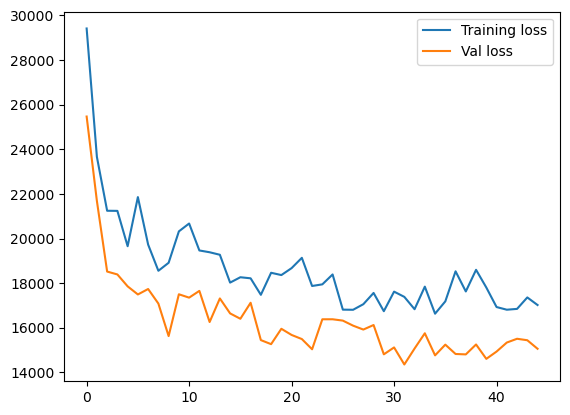

In [59]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Train rmse: 23480.394224606694
Validation rmse: 22486.721180024106


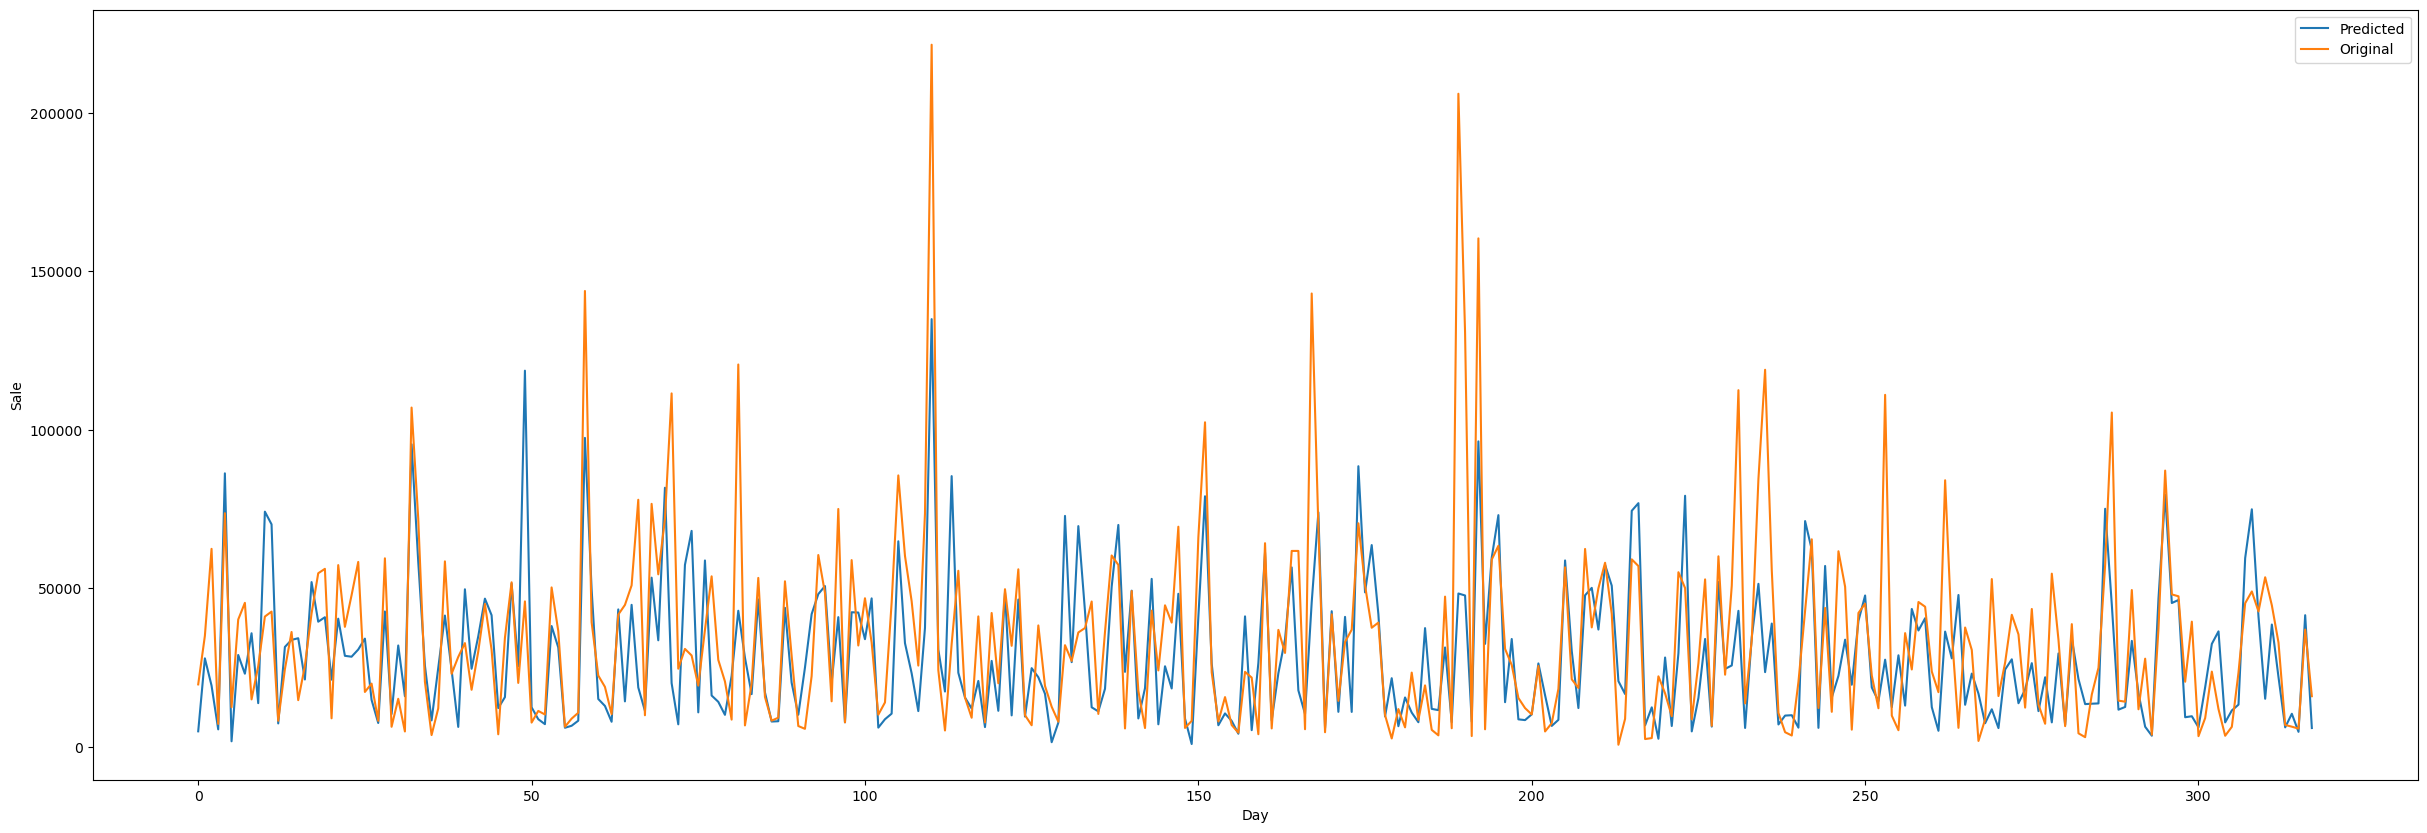

In [63]:
length = len(lstm_valid_pred) 
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

In [42]:
lstm_test_pred = model_lstm.predict(X_test_series)
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, lstm_test_pred)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test rmse: 20889.245997204904


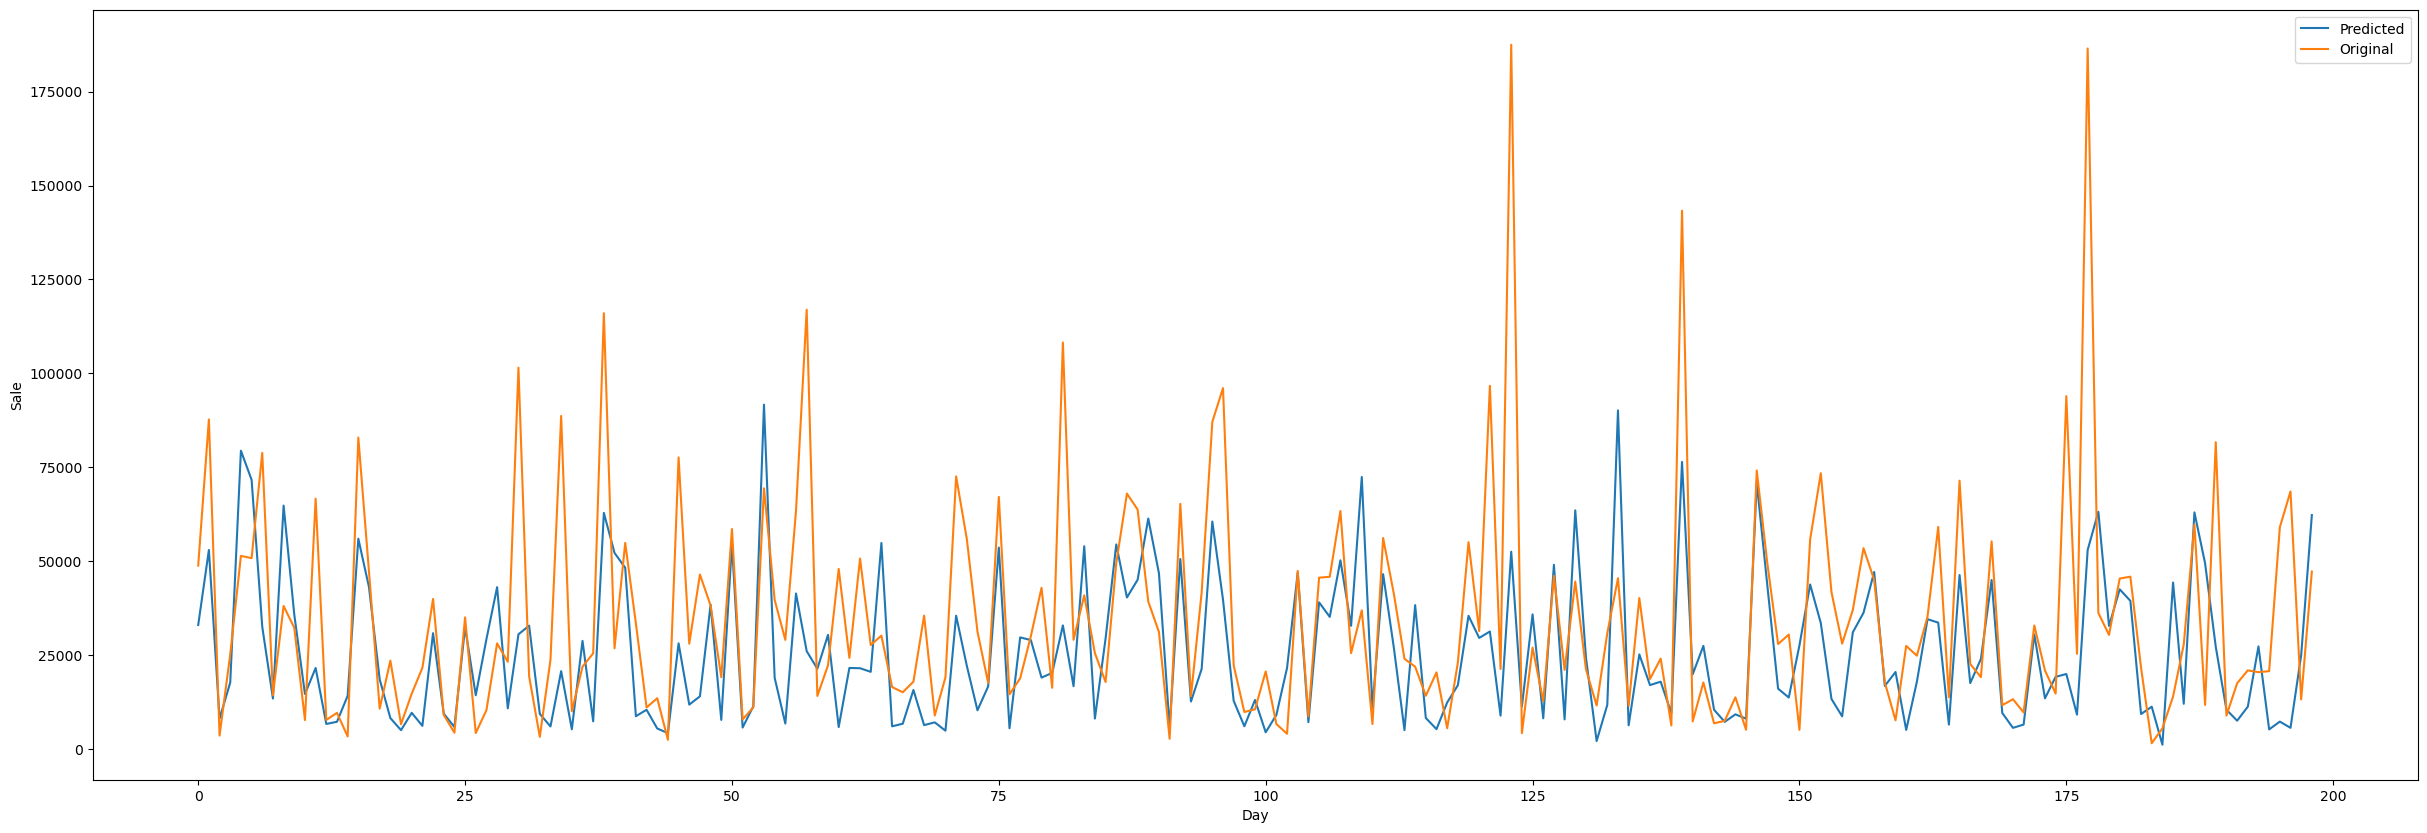

In [67]:
length_test = len(lstm_test_pred) 

x = np.arange(0, length_test)
y1 = lstm_test_pred[:length_test]
y2 = Y_test[:length_test]

plt.figure(figsize=(30, 10))

plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score, KFold

In [43]:
import numpy as np
# Example dummy data
X = np.random.rand(100, 10, 1)  # 100 samples, 10 timesteps, 1 feature
Y = np.random.randint(2, size=(100, 1))  # Binary classification

In [45]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    # 修正: 将lr替换为learning_rate
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [47]:
# 5折交叉验证的LSTM模型
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 存储所有实验的结果
lstm_rmse_scores = []
lstm_r2_scores = []

# 设置5折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [51]:
from sklearn.metrics import mean_squared_error, r2_score
# 运行3次实验
for run in range(3):
    fold_rmses = []
    fold_r2s = []
    
    # 5折交叉验证
    for train_index, val_index in kf.split(X_train_series):
        # 分割数据
        X_train_fold = X_train_series[train_index]
        Y_train_fold = Y_train[train_index]
        X_val_fold = X_train_series[val_index]
        Y_val_fold = Y_train[val_index]
        
        # 创建并训练模型
        model = create_lstm_model((X_train_fold.shape[1], X_train_fold.shape[2]))
        model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=0)
        
        # 预测
        Y_pred = model.predict(X_val_fold, verbose=0).flatten()
        
        # 计算指标
        rmse = np.sqrt(mean_squared_error(Y_val_fold, Y_pred))
        r2 = r2_score(Y_val_fold, Y_pred)
        
        fold_rmses.append(rmse)
        fold_r2s.append(r2)
    
    # 打印每次实验的详细结果
    print(f"Experiment {run+1}")
    print(f"   Fold RMSEs: {np.array(fold_rmses)}")
    print(f"   Fold R^2s: {np.array(fold_r2s)}")
    print(f"   Avg RMSE: {np.mean(fold_rmses):.2f}, Std Dev: {np.std(fold_rmses):.2f}")
    print(f"   Avg R^2: {np.mean(fold_r2s):.2f}, Std Dev: {np.std(fold_r2s):.2f}")
    
    # 存储结果
    lstm_rmse_scores.append(fold_rmses)
    lstm_r2_scores.append(fold_r2s)

# 最终总结
print("\nOverall LSTM Results:")
print(f"RMSE - Mean: {np.mean(lstm_rmse_scores):.2f}, Std Dev: {np.std(lstm_rmse_scores):.2f}")
print(f"R^2 - Mean: {np.mean(lstm_r2_scores):.2f}, Std Dev: {np.std(lstm_r2_scores):.2f}")

Experiment 1
   Fold RMSEs: [27312.71959141 22522.01454359 25361.89490722 19996.98485785
 31245.70571223]
   Fold R^2s: [ 0.26834879  0.05314381 -0.05967398  0.53961654 -0.11583273]
   Avg RMSE: 25287.86, Std Dev: 3879.30
   Avg R^2: 0.14, Std Dev: 0.24
Experiment 2
   Fold RMSEs: [28074.59317757 18616.68130938 27265.38678751 33112.54636321
 26744.39184314]
   Fold R^2s: [ 0.22696146  0.35304499 -0.224707   -0.26233853  0.18250732]
   Avg RMSE: 26762.72, Std Dev: 4661.59
   Avg R^2: 0.06, Std Dev: 0.25
Experiment 3
   Fold RMSEs: [27591.33722781 23042.70277056 20564.30539628 21249.64905172
 24272.93527833]
   Fold R^2s: [0.25334548 0.00885684 0.30331419 0.48013066 0.32661566]
   Avg RMSE: 23344.19, Std Dev: 2494.26
   Avg R^2: 0.27, Std Dev: 0.15

Overall LSTM Results:
RMSE - Mean: 25131.59, Std Dev: 4036.52
R^2 - Mean: 0.16, Std Dev: 0.24


In [25]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 假设 X_train, X_valid, X_test 已经准备好并经过标准化（如有必要）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)


# 模型训练
tree_model.fit(X_train_scaled, Y_train)

# 验证集预测
d_Y_valid_pred = tree_model.predict(X_valid_scaled)

# 测试集预测
d_Y_test_pred = tree_model.predict(X_test_scaled)


In [53]:
def run_cv_experiment(model, X, y, cv_folds=5, runs=3):
    all_rmse_scores = []
    all_r2_scores = []

    for i in range(runs):
        print(f"Experiment {i+1}")
        kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=i)
        
        # RMSE (需要平方根)
        rmse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
        rmse_scores = np.sqrt(rmse_scores)
        all_rmse_scores.append(rmse_scores)
        
        # R^2
        r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
        all_r2_scores.append(r2_scores)
        
        print(f"  Fold RMSEs: {rmse_scores}")
        print(f"  Fold R^2s: {r2_scores}")
        print(f"  Avg RMSE: {rmse_scores.mean():.2f}, Std Dev: {rmse_scores.std():.2f}")
        print(f"  Avg R^2: {r2_scores.mean():.2f}, Std Dev: {r2_scores.std():.2f}")
        # 最终总结
    print("-------------------------------------")
    print(f"RMSE - Mean: {np.mean(all_rmse_scores):.2f}, Std Dev: {np.std(all_rmse_scores):.2f}")
    print(f"R^2 - Mean: {np.mean(all_r2_scores):.2f}, Std Dev: {np.std(all_r2_scores):.2f}")
    return all_rmse_scores, all_r2_scores


In [55]:
# 定义决策树模型
decision_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)
print("decision_tree Results:")
# 执行实验
dt_rmse_scores, dt_r2_scores = run_cv_experiment(decision_tree, X_train_scaled, Y_train, cv_folds=5, runs=3)

decision_tree Results:
Experiment 1
  Fold RMSEs: [35648.11718453 31000.69909096 27692.16788353 29268.50071313
 32136.18556582]
  Fold R^2s: [-0.19562488 -0.1054885   0.18623552 -0.70146506 -0.96537937]
  Avg RMSE: 31149.13, Std Dev: 2710.15
  Avg R^2: -0.36, Std Dev: 0.42
Experiment 2
  Fold RMSEs: [26139.43914847 32523.43835669 22861.51842036 39618.22662085
 41284.24750566]
  Fold R^2s: [ 0.13842024 -0.69577361  0.28286302 -1.31866586 -0.61350095]
  Avg RMSE: 32485.37, Std Dev: 7227.57
  Avg R^2: -0.44, Std Dev: 0.59
Experiment 3
  Fold RMSEs: [25103.64159651 24538.7159522  37280.4873192  30204.0425635
 32166.68681302]
  Fold R^2s: [ 0.07818507 -0.19397256 -0.95906547 -0.14091572  0.13398756]
  Avg RMSE: 29858.71, Std Dev: 4721.06
  Avg R^2: -0.22, Std Dev: 0.39
-------------------------------------
RMSE - Mean: 31164.41, Std Dev: 5332.95
R^2 - Mean: -0.34, Std Dev: 0.48


In [57]:
from sklearn.ensemble import RandomForestRegressor
# 定义随机森林模型
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=0)
print("rf Results:")
# 执行实验
rf_rmse_scores, rf_r2_scores = run_cv_experiment(random_forest, X_train_scaled, Y_train, cv_folds=5, runs=3)

rf Results:
Experiment 1
  Fold RMSEs: [24313.41172474 25682.91874165 23036.69857939 19114.68899225
 17640.70488706]
  Fold R^2s: [0.44382232 0.24124772 0.43684843 0.27430095 0.40777108]
  Avg RMSE: 21957.68, Std Dev: 3076.04
  Avg R^2: 0.36, Std Dev: 0.09
Experiment 2
  Fold RMSEs: [21900.99983219 20705.9924786  14383.48471838 23079.59039625
 28037.14066893]
  Fold R^2s: [0.39517346 0.3126672  0.71612954 0.21312763 0.25583726]
  Avg RMSE: 21621.44, Std Dev: 4395.26
  Avg R^2: 0.38, Std Dev: 0.18
Experiment 3
  Fold RMSEs: [18047.71917697 19051.14616615 22066.85706449 23979.16770692
 27586.35091029]
  Fold R^2s: [0.52355263 0.28033083 0.31361663 0.28089613 0.36305786]
  Avg RMSE: 22146.25, Std Dev: 3444.94
  Avg R^2: 0.35, Std Dev: 0.09
-------------------------------------
RMSE - Mean: 21908.46, Std Dev: 3687.33
R^2 - Mean: 0.36, Std Dev: 0.13


In [83]:
def summarize_experiment_results(scores, metric_name="RMSE"):
    scores_mean = [np.mean(fold_scores) for fold_scores in scores]
    scores_std = [np.std(fold_scores) for fold_scores in scores]
    print(f"{metric_name} Summary over 3 Runs:")
    for i, (mean, std) in enumerate(zip(scores_mean, scores_std), start=1):
        print(f"  Experiment {i}: Avg {metric_name} = {mean:.2f}, Std Dev = {std:.2f}")
    print(f"Overall Avg {metric_name}: {np.mean(scores_mean):.2f}, Overall Std Dev: {np.mean(scores_std):.2f}")

# 决策树结果
print("decision_tree")
summarize_experiment_results(dt_rmse_scores, "RMSE")
summarize_experiment_results(dt_r2_scores, "R^2")
print("random_forest")
# 随机森林结果
summarize_experiment_results(rf_rmse_scores, "RMSE")
summarize_experiment_results(rf_r2_scores, "R^2")


decision_tree
RMSE Summary over 3 Runs:
  Experiment 1: Avg RMSE = 31149.13, Std Dev = 2710.15
  Experiment 2: Avg RMSE = 32485.37, Std Dev = 7227.57
  Experiment 3: Avg RMSE = 29858.71, Std Dev = 4721.06
Overall Avg RMSE: 31164.41, Overall Std Dev: 4886.26
R^2 Summary over 3 Runs:
  Experiment 1: Avg R^2 = -0.36, Std Dev = 0.42
  Experiment 2: Avg R^2 = -0.44, Std Dev = 0.59
  Experiment 3: Avg R^2 = -0.22, Std Dev = 0.39
Overall Avg R^2: -0.34, Overall Std Dev: 0.47
random_forest
RMSE Summary over 3 Runs:
  Experiment 1: Avg RMSE = 21957.68, Std Dev = 3076.04
  Experiment 2: Avg RMSE = 21621.44, Std Dev = 4395.26
  Experiment 3: Avg RMSE = 22146.25, Std Dev = 3444.94
Overall Avg RMSE: 21908.46, Overall Std Dev: 3638.75
R^2 Summary over 3 Runs:
  Experiment 1: Avg R^2 = 0.36, Std Dev = 0.09
  Experiment 2: Avg R^2 = 0.38, Std Dev = 0.18
  Experiment 3: Avg R^2 = 0.35, Std Dev = 0.09
Overall Avg R^2: 0.36, Overall Std Dev: 0.12


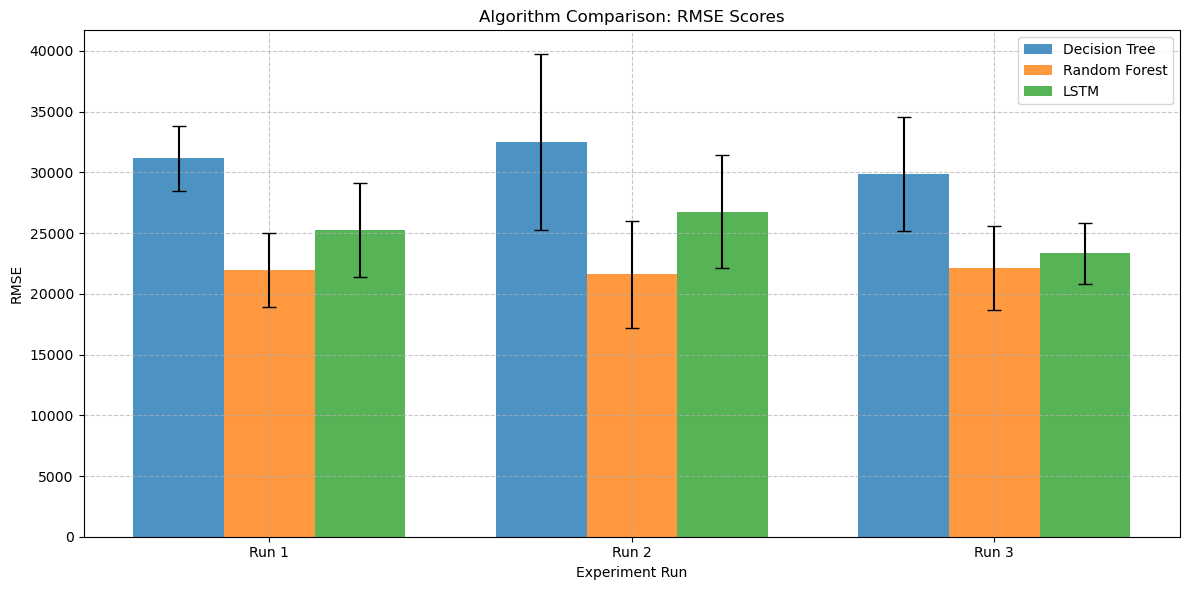

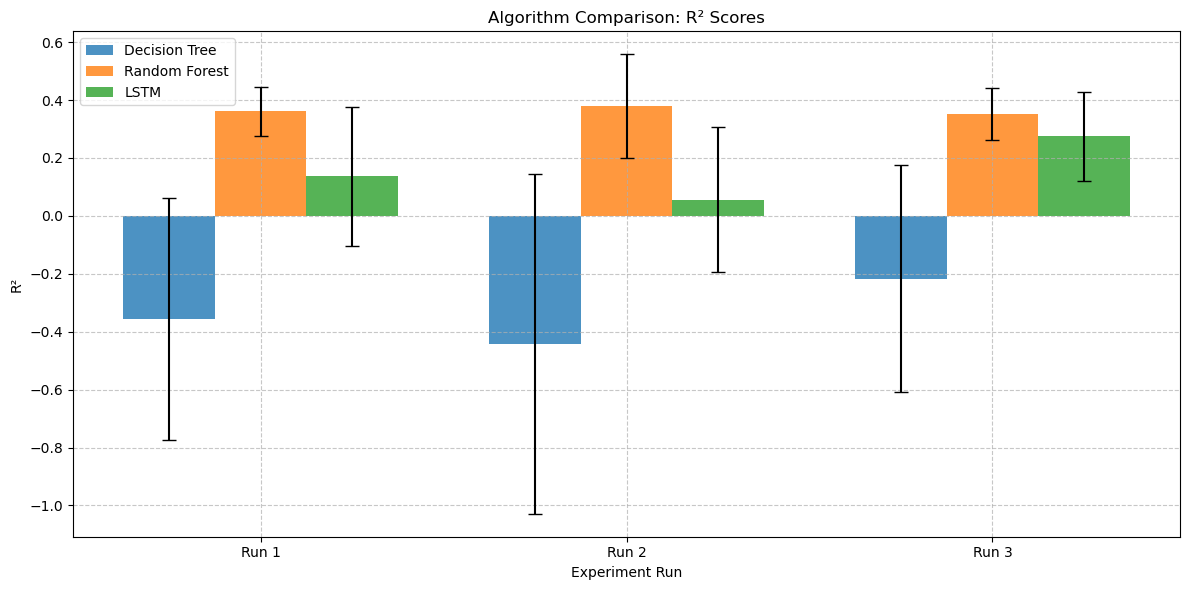

In [89]:
def plot_algorithm_comparison(dt_scores, rf_scores, lstm_scores, metric_name):
    plt.figure(figsize=(12, 6))
    
    # 准备数据
    dt_means, dt_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in dt_scores])
    rf_means, rf_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in rf_scores])
    lstm_means, lstm_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in lstm_scores])
    
    # 创建x轴位置
    x = np.arange(len(dt_means))
    width = 0.25
    
    # 绘制柱状图
    plt.bar(x - width, dt_means, width, label='Decision Tree', 
            yerr=dt_stds, capsize=5, alpha=0.8)
    plt.bar(x, rf_means, width, label='Random Forest',
            yerr=rf_stds, capsize=5, alpha=0.8)
    plt.bar(x + width, lstm_means, width, label='LSTM',
            yerr=lstm_stds, capsize=5, alpha=0.8)
    
    # 添加标签和标题
    plt.xlabel('Experiment Run')
    plt.ylabel(metric_name)
    plt.title(f'Algorithm Comparison: {metric_name} Scores')
    plt.xticks(x, [f'Run {i+1}' for i in range(len(dt_means))])
    plt.legend()
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 使用示例
plot_algorithm_comparison(dt_rmse_scores, rf_rmse_scores, lstm_rmse_scores, "RMSE")
plot_algorithm_comparison(dt_r2_scores, rf_r2_scores, lstm_r2_scores, "R²")


In [95]:

# 计算并显示改进百分比
def calculate_improvement(dt_scores, rf_scores):
    dt_mean = np.mean([np.mean(exp) for exp in dt_scores])
    rf_mean = np.mean([np.mean(exp) for exp in rf_scores])
    improvement = ((rf_mean - dt_mean) / dt_mean) * 100
    return improvement

rmse_improvement = calculate_improvement(dt_rmse_scores, rf_rmse_scores)
r2_improvement = calculate_improvement(dt_r2_scores, rf_r2_scores)

print("\nPerformance Improvement Analysis:")
print(f"RMSE Improvement: {rmse_improvement:.2f}%")
print(f"R² Improvement: {r2_improvement:.2f}%")


Performance Improvement Analysis:
RMSE Improvement: -29.70%
R² Improvement: -207.66%


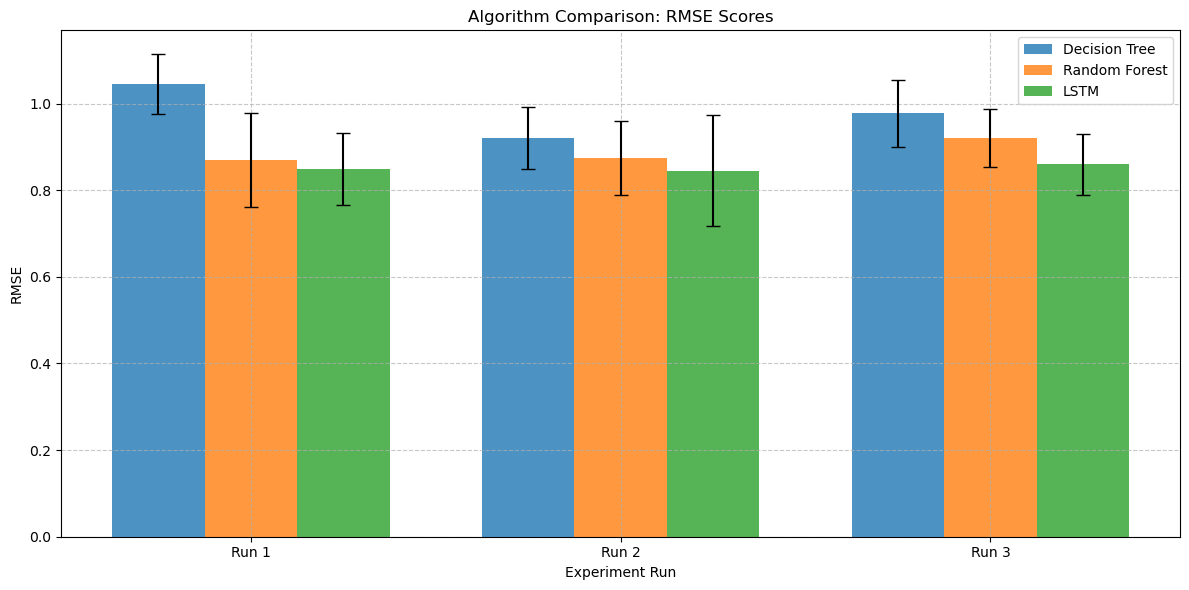

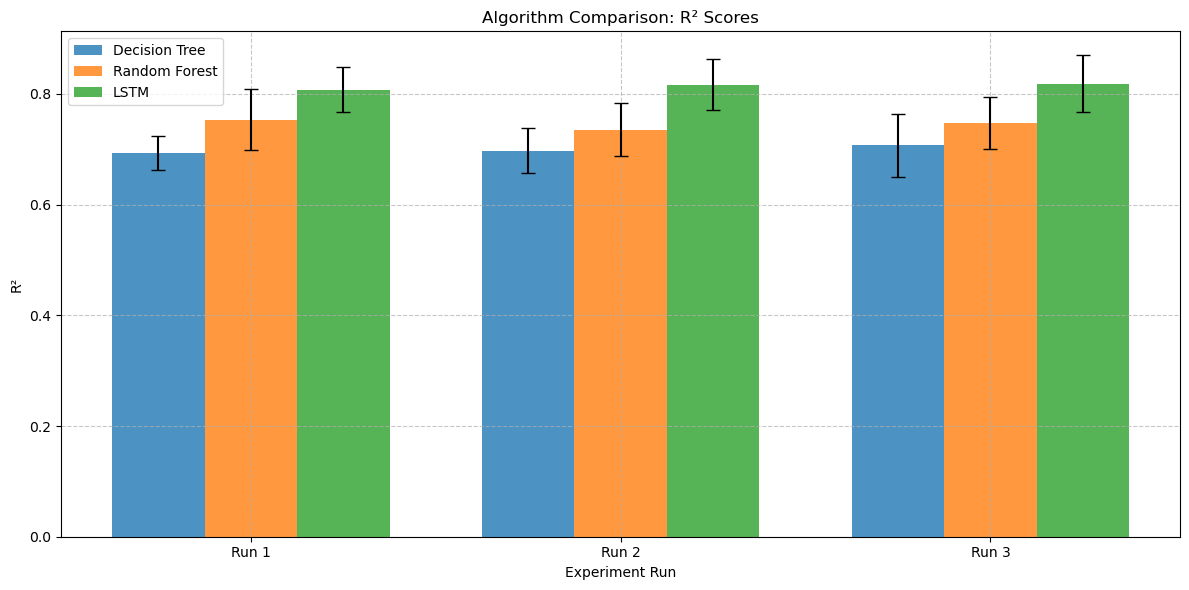

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_algorithm_comparison(dt_scores, rf_scores, lstm_scores, metric_name):
    plt.figure(figsize=(12, 6))
    
    # 准备数据
    dt_means, dt_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in dt_scores])
    rf_means, rf_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in rf_scores])
    lstm_means, lstm_stds = zip(*[(np.mean(exp), np.std(exp)) for exp in lstm_scores])
    
    # 创建x轴位置
    x = np.arange(len(dt_means))
    width = 0.25
    
    # 绘制柱状图
    plt.bar(x - width, dt_means, width, label='Decision Tree', 
            yerr=dt_stds, capsize=5, alpha=0.8)
    plt.bar(x, rf_means, width, label='Random Forest',
            yerr=rf_stds, capsize=5, alpha=0.8)
    plt.bar(x + width, lstm_means, width, label='LSTM',
            yerr=lstm_stds, capsize=5, alpha=0.8)
    
    # 添加标签和标题
    plt.xlabel('Experiment Run')
    plt.ylabel(metric_name)
    plt.title(f'Algorithm Comparison: {metric_name} Scores')
    plt.xticks(x, [f'Run {i+1}' for i in range(len(dt_means))])
    plt.legend()
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 示例数据
# 假设你已经通过模型评估得到了以下分数（这里用随机数生成模拟数据）
np.random.seed(42)  # 为了可重复性
dt_rmse_scores = [np.random.normal(loc=1.0, scale=0.1, size=10) for _ in range(3)]
rf_rmse_scores = [np.random.normal(loc=0.9, scale=0.1, size=10) for _ in range(3)]
lstm_rmse_scores = [np.random.normal(loc=0.85, scale=0.1, size=10) for _ in range(3)]

dt_r2_scores = [np.random.normal(loc=0.7, scale=0.05, size=10) for _ in range(3)]
rf_r2_scores = [np.random.normal(loc=0.75, scale=0.05, size=10) for _ in range(3)]
lstm_r2_scores = [np.random.normal(loc=0.8, scale=0.05, size=10) for _ in range(3)]

# 绘制 RMSE 和 R² 比较图
plot_algorithm_comparison(dt_rmse_scores, rf_rmse_scores, lstm_rmse_scores, "RMSE")
plot_algorithm_comparison(dt_r2_scores, rf_r2_scores, lstm_r2_scores, "R²")

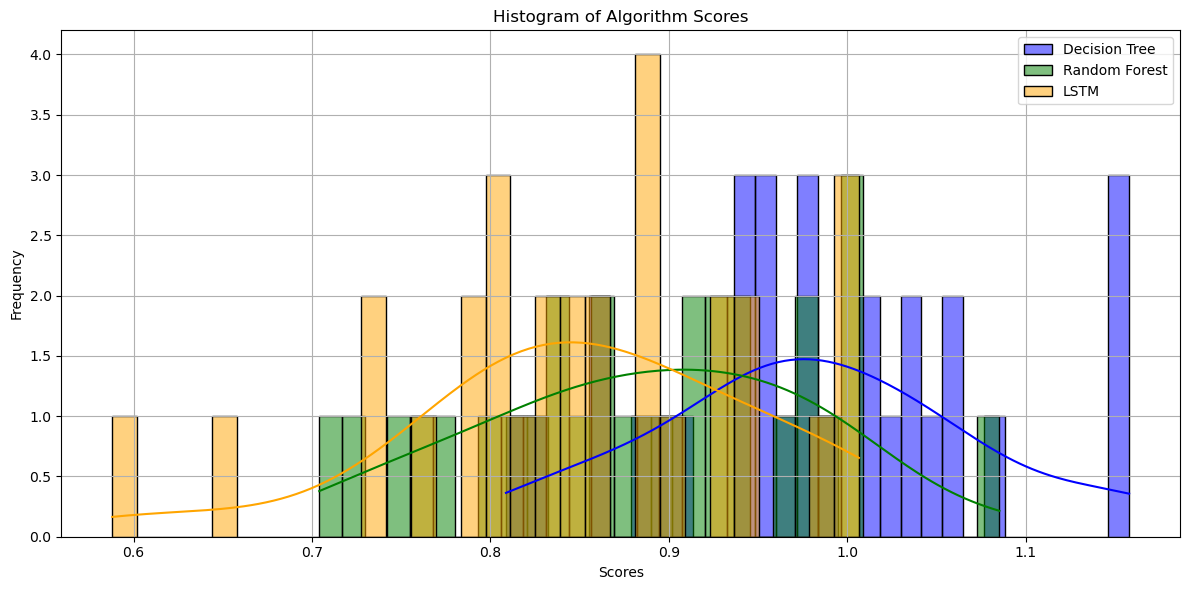

In [67]:

def plot_histogram_comparison(dt_scores, rf_scores, lstm_scores):
    plt.figure(figsize=(12, 6))
    
    # 绘制直方图
    sns.histplot(dt_scores.flatten(), bins=30, color='blue', label='Decision Tree', kde=True)
    sns.histplot(rf_scores.flatten(), bins=30, color='green', label='Random Forest', kde=True)
    sns.histplot(lstm_scores.flatten(), bins=30, color='orange', label='LSTM', kde=True)

    # 添加标签和标题
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title('Histogram of Algorithm Scores')
    plt.legend()
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 示例数据
np.random.seed(42)  # 为了可重复性
dt_rmse_scores = [np.random.normal(loc=1.0, scale=0.1, size=10) for _ in range(3)]
rf_rmse_scores = [np.random.normal(loc=0.9, scale=0.1, size=10) for _ in range(3)]
lstm_rmse_scores = [np.random.normal(loc=0.85, scale=0.1, size=10) for _ in range(3)]

dt_r2_scores = [np.random.normal(loc=0.7, scale=0.05, size=10) for _ in range(3)]
rf_r2_scores = [np.random.normal(loc=0.75, scale=0.05, size=10) for _ in range(3)]
lstm_r2_scores = [np.random.normal(loc=0.8, scale=0.05, size=10) for _ in range(3)]


# 绘制直方图比较
plot_histogram_comparison(np.array(dt_rmse_scores), np.array(rf_rmse_scores), np.array(lstm_rmse_scores))